In [3]:
%matplotlib inline

import gc
import os, sys
import multiprocessing as mul
from multiprocessing.dummy import Pool
import time

import pandas as pd
import numpy as np
import random
import gc
from tqdm import tqdm_notebook as tqdm
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns

import dankypipe.pipe as pipe

InteractiveShell.ast_node_interactivity = 'all'
random.seed(42)
np.random.seed(42)

In [4]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion_float':                                  'float16',
        'AppVersion_float':                                     'float16',
        'AvSigVersion_float':                                   'float16',
        'IsBeta':                                               'int8',
        'RtpStateBitfield_1':                                   'int8',
        'RtpStateBitfield_2':                                   'int8',
        'RtpStateBitfield_3':                                   'int8',
        'RtpStateBitfield_4':                                   'int8',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'category',
        'AVProductStatesIdentifier_filled':                     'category',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'category',
        'CityIdentifier_filled':                                'category',
        'OrganizationIdentifier_filled':                        'category',
        'LocaleEnglishNameIdentifier':                          'category',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier_filled':                               'float16',
        'SmartScreen_filled':                                   'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2_FormFactor_clean':                         'category',
        'Census_MDC2_FormFactor_isValid':                       'int8',
        'Census_FFMatch':                                       'int8',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier_filled':                      'float16',
        'Census_OEMModelIdentifier_filled':                     'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier_filled':        'category',
        'Census_ProcessorModelIdentifier_filled':               'category',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName_clean':                         'category',
        'Census_ChassisTypeName_isValid':                       'int8',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName_filled':                  'category',
        'Census_InternalBatteryType_reduced':                   'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition_clean':                               'category',
        'OS_Reduced_Media':                                     'int8',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier_filled':            'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSEdSkuMatch':                                  'int8',
        'Census_OSVersion_float':                               'float16',
        'Census_OSWUAutoUpdateOptionsName_filled':              'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName_filled':                       'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing_filled':                             'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier_filled':         'float16',
        'Census_FirmwareVersionIdentifier_filled':              'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'branch_ver':                                           'category',
        'subrel_ver':                                           'category',
        'subrel_ver_num':                                       'int',
        'branch_release_num':                                   'int',
        'is_svc_release':                                       'int8',
        'is_escrow_release':                                    'int8',
        'is_sec_release':                                       'int8',
        'is_st1_release':                                       'int8',
        'is_prerelease':                                        'int8',
        'is_special_release':                                   'int8',
        'HasDetections':                                        'int8'
}

In [5]:
train_fn = 'train_r1.csv'
test_fn = 'test_r1.csv'

train = pd.read_csv(train_fn, dtype=dtypes)
test = pd.read_csv(test_fn, dtype=dtypes)

In [6]:
avSigTs = np.load('AvSigVersionTimestamps.npy')

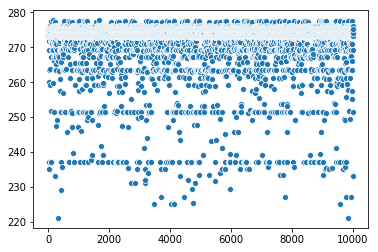

In [8]:
pp = train.sample(int(1e4))

sns.scatterplot(
    x=np.arange(pp.shape[0]),
    y=pp.AvSigVersion_float.tolist()
)